# Target ensemble: canonical
# S distribution: logistic
# System: Harmonic Oscillator

This notebook shows how to analyze the data of the simulation generated by the file **script.jl** which is based on the algorithm designed [here](http://arxiv.org/abs/1510.03942)

## Extracting the data

In [1]:
using HDF5
using PyPlot
using KernelDensity   #Needed modules

In [7]:
filename = "cienmil.hdf5" #The file must exist in the HDF5 folder
file = h5open("../HDF5/$filename", "r")

HDF5 data file: ../HDF5/cienmil.hdf5

In [8]:
beta = read(attrs(file)["beta"])
c = read(attrs(file)["c"]);

In [12]:
sim = read(file, "simulation-1")

Dict{ByteString,Any} with 6 entries:
  "S"         => [0.105482,0.86219,1.49481,2.08105,2.67392,3.32937,4.13769,5.31…
  "initcond"  => [0.5966668242261206,0.15518682208642054,0.10548221364006038]
  "t"         => [0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45  …  4999.5,4999.…
  "q"         => [0.596667,0.600267,0.60032,0.59827,0.594033,0.586215,0.570148,…
  "invariant" => [-5.69444,-5.69444,-5.69444,-5.69444,-5.69444,-5.69444,-5.6944…
  "p"         => [0.155187,0.0408329,-0.0358908,-0.104528,-0.18372,-0.298078,-0…

In [13]:
t = sim["t"]
q = sim["q"]
p = sim["p"]
S = sim["S"];
i = sim["invariant"];

## Extended phase space projections

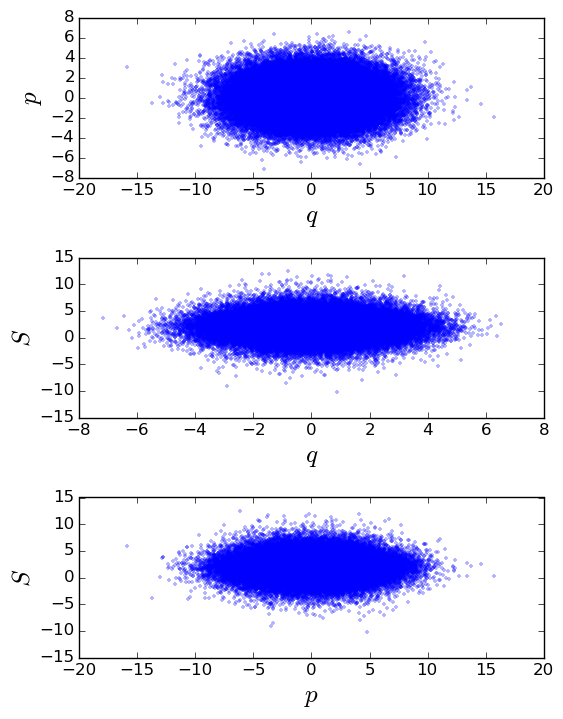

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f527cafde90>

In [24]:
fig = plt[:figure](figsize=(6,8))
fig[:subplots_adjust](hspace=.5)


ax = fig[:add_subplot](311)
ax[:set_xlabel](L"$q$",fontsize="18")
ax[:set_ylabel](L"$p$",fontsize="18")
ax[:plot](p,q,".", alpha =0.3, markeredgewidth=0.)

ax = fig[:add_subplot](312)
ax[:set_xlabel](L"$q$",fontsize="18")
ax[:set_ylabel](L"$S$", fontsize="18")
ax[:plot](q,S,".", alpha =0.3, markeredgewidth=0.)


ax = fig[:add_subplot](313)
ax[:set_xlabel](L"$p$",fontsize="18")
ax[:set_ylabel](L"$S$",fontsize="18")
ax[:plot](p,S,".", alpha =0.3, markeredgewidth=0.)

## Histograms

In [25]:
qarray = linspace(-6,6,100)
rhoq = exp(-beta*2*qarray.^2)/sqrt(pi/(2*beta));  #Theoretical marginal distribution of q;

In [26]:
parray = linspace(-10,10,100)
rhop = exp(-beta*parray.^2/2.)/sqrt((2*pi)/(beta));  #Theoretical marginal distribution of p;

In [27]:
E = (p.^2/2 + 2*q.^2)  #Energy;

In [28]:
earray = linspace(0.,80.,100)
rhoe = exp(-beta*earray)/(1/beta); #Theoretical marginal distribution of E;

In [29]:
sarray = linspace(-5.,10.,100)
rhos = exp(sarray-c)./((1.+exp(sarray-c)).^2); #Theoretical marginal distribution of S (logistic);

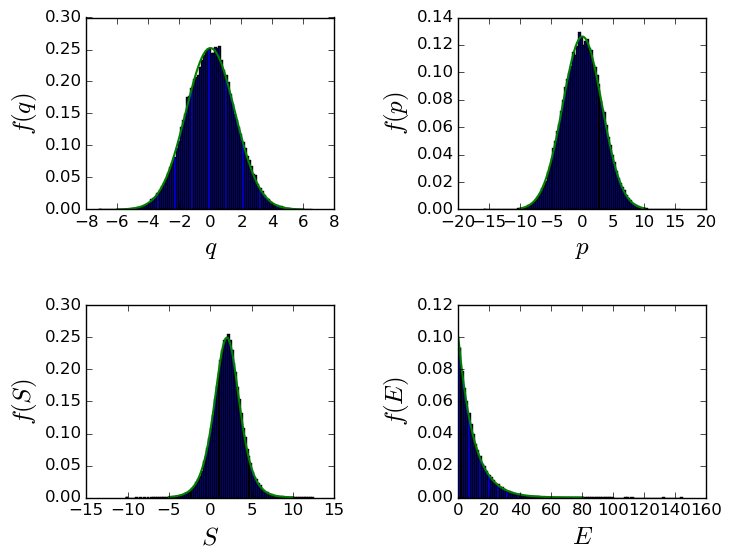

PyObject <matplotlib.text.Text object at 0x7f527c034bd0>

In [30]:
fig = plt[:figure]( )
fig[:subplots_adjust](hspace=.5)
fig[:subplots_adjust](wspace=.5)

ax = fig[:add_subplot](221)
ax[:hist](q,100, normed = 1.)
ax[:plot](qarray,rhoq, linewidth=1.5)
ax[:set_xlabel](L"$q$",fontsize="18")
ax[:set_ylabel](L"$f(q)$",fontsize="18")


ax = fig[:add_subplot](222)
ax[:hist](p,100, normed = 1.)
ax[:plot](parray,rhop, linewidth = 1.5)
ax[:set_xlabel](L"$p$",fontsize="18")
ax[:set_ylabel](L"$f(p)$",fontsize="18")


ax = fig[:add_subplot](223)
ax[:hist](S,100, normed = 1.)
ax[:set_ylim]([0.0,0.30])
ax[:plot](sarray,rhos, linewidth = 1.5)
ax[:set_xlabel](L"$S$",fontsize="18")
ax[:set_ylabel](L"$f(S)$",fontsize="18")

ax = fig[:add_subplot](224)
ax[:hist](E,100, normed = 1.)
ax[:plot](earray,rhoe, linewidth=1.5)
ax[:set_xlabel](L"$E$",fontsize="18")
ax[:set_ylabel](L"$f(E)$",fontsize="18")



## Joint distribution

In [31]:
k= kde((p,q))  #Kernel density estimation;

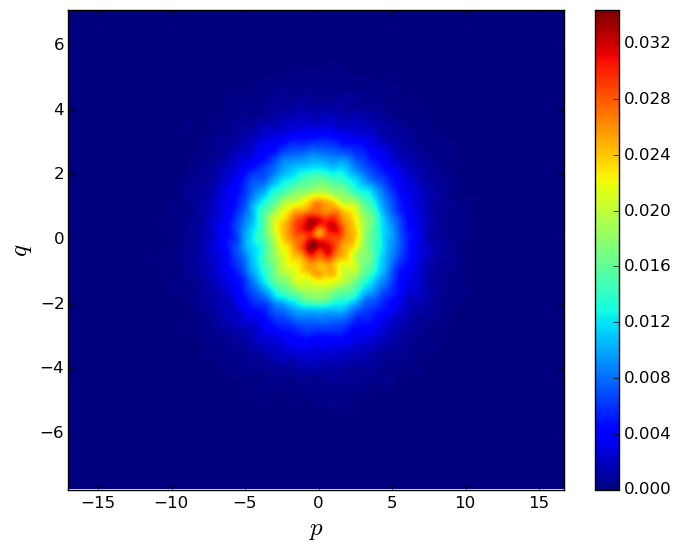

PyObject <matplotlib.text.Text object at 0x7f527c483890>

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


In [32]:
imshow(k,aspect="auto")
plt[:colorbar]()
plt[:xlabel](L"$p$",fontsize="18")
plt[:ylabel](L"$q$", fontsize = "18")

## Energy average

In [33]:
Eavg = [Float64(sum(E[1:j])/j) for j in 1:(length(E))];

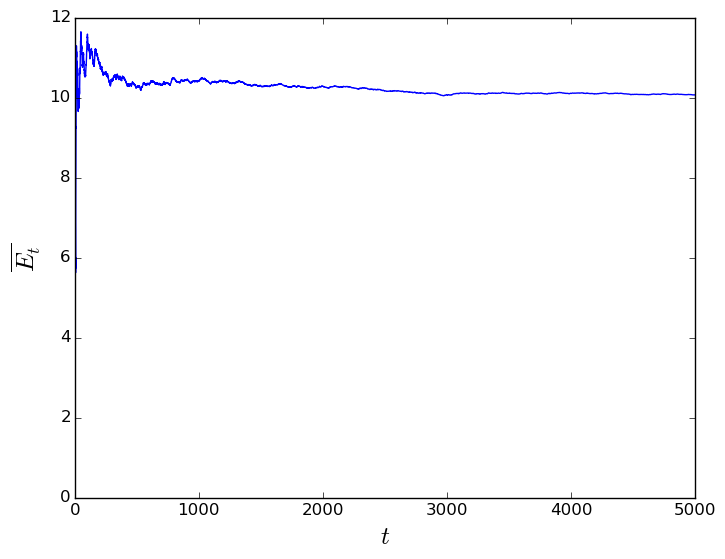

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f527b485190>

In [34]:
plt[:ylabel](L"$\overline{E_t}$",fontsize="18")
plt[:xlabel](L"$t$", fontsize = "18")
plot(t, Eavg)

## Extended invariant

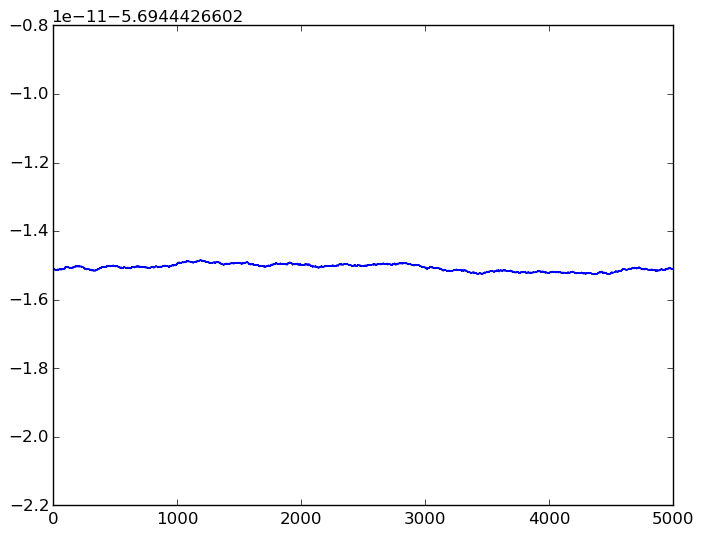

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f527b3a05d0>

In [36]:
plot(t,i)

In [38]:
maximum(i) - minimum(i)  ##The extended invariant remains in a fix value

4.156675004196586e-13

In [35]:
close(file)